In [2]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

import time
import heatmap_setup as hm
import numpy as np

from SES_setup import *
from utils import *
from style import *

SES_setup loaded globally


In [3]:
plt.style.use('ggplot')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.5
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} ')
colours = ['#1E90FF', '#3CB371', '#FFA500', '#FF0000']

In [4]:
def calculate_WC_add_steadystate_comparison(PARAMS, num, threshold=0.):
    phonons = np.linspace(0.5, 50, 45)
    ti =time.time()
    rho_add = []
    rho_add_shift = []
    rho_nonadd = []
    rho_wc = []
    rho_wc_shift = []
    rho_wcs = []
    op_list = []
    for j, alpha in enumerate(phonons):
        #PARAMS = get_converged_N(PARAMS, err_threshold=5., min_N=3,max_N=11, silent=True, exc_diff_N=False)
        
        PARAMS.update({'alpha_1':alpha, 'alpha_2': alpha})
        #energies, states = exciton_states(PARAMS)
        H, L, PARAMS = get_H_and_L(PARAMS,silent=True, threshold=0.)
        H_wc, L_ns, L_s = get_H_and_L_wc(PARAMS['H_sub'], PARAMS)
        #_, L_wc_shift, L_s_ = get_H_and_L_wc(H[0], PARAMS)
        #rho_add_shift.append(steadystate(H[1], [L['add-shift']]))
        rho_add.append(steadystate(H[1], [L['add']]))
        rho_nonadd.append(steadystate(H[1], [L['nonadd']]))
        #rho_wc_shift.append(steadystate(H[0], [L_wc_shift])) # shift in wc LVN
        rho_wc.append(steadystate(H[0], [L_ns])) # shift in wc LVN
        #rho_wcs.append(steadystate(H[0], [L_s]))
        op_list.append(make_expectation_operators(PARAMS))
        if j in [1,10,20,30,40,49]:
            print(alpha)
        #print ss.diag()
    data_dict = {}
    filename = 'DATA/Gamma_w0_dep/3ls_{}'.format(num)
    PARAM_names = ['rho_nonadd', 'rho_add', 
                   'rho_wc', 'op_list', 'phonons', 'PARAMS']
    scope = locals() # Lets eval below use local variables, not global
    data_dict.update(dict((name, eval(name, scope)) for name in PARAM_names))
    print("Calculation took {} seconds".format(time.time()-ti))
    try:
        save_obj(data_dict, filename)
        print( "Filename: "+filename)
    except Exception as e:
        print("Could not save file because: {}".format(e))
    return data_dict



# 3LS-4LS comparison: Paper plots 27/02/2019

In [ ]:
T_ph = 300.
w_2 = 1.4*ev_to_inv_cm
bias = 0. #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = 10e-3*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 0.
T_EM = 6000.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
N =6
#wc = 50.
w_0 = 80e-3*ev_to_inv_cm
Gamma = 30e-3*ev_to_inv_cm

In [ ]:
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)

data_dict_1_w2 = calculate_WC_add_steadystate_comparison(PARAMS, '1', threshold=1e-10)

# Population ratio data collection for plots 27/02/2019

In [10]:
#Omegas = np.array([ 30e-3, 60e-3, 120e-3])*ev_to_inv_cm
#Omegas = np.array([ 30*1e-3, 60*1e-3, 120*1e-3])*ev_to_inv_cm
#Omegas = np.array([20e-3, 30e-3, 40e-3])*ev_to_inv_cm
#Omegas = np.array([ 15e-3, 20e-3, 60e-3, 120e-3])*ev_to_inv_cm
#Omegas = np.array([100,200,300])

def plot_population_ratio(data_dict, label='0'):
    PARAMS = data_dict['PARAMS']
    ops = make_expectation_operators(PARAMS)
    pd = np.array([i.tr() for i in data_dict['rho_nonadd']*ops['dark']])
    pb = np.array([i.tr() for i in data_dict['rho_nonadd']*ops['bright']])
    pg = np.array([i.tr() for i in data_dict['rho_nonadd']*ops['OO']])
    #plt.plot(pd, label='DS')
    #plt.plot(pg, label='GS')
    #plt.legend()
    #plt.figure()
    plt.plot(((pd)/pg).real, label=label)
    plt.legend()

5.0
45.5
Calculation took 208.0560338497162 seconds
Filename: DATA/Gamma_w0_dep/3ls_161
5.0
45.5
Calculation took 229.50867700576782 seconds
Filename: DATA/Gamma_w0_dep/3ls_241
5.0
45.5
Calculation took 249.18489122390747 seconds
Filename: DATA/Gamma_w0_dep/3ls_322


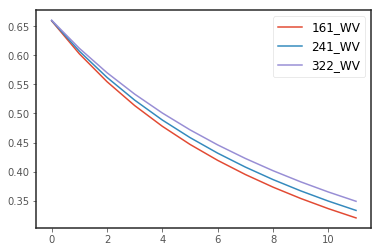

In [13]:
dd_list = []
#Omegas = np.array([ 30*1e-3, 60*1e-3, 120*1e-3])*ev_to_inv_cm
Omegas = np.array([ 40*1e-3, 80*1e-3, 120*1e-3])*ev_to_inv_cm
for w0 in Omegas:
    N=6
    T_ph = 100.
    w_2 = 1.4*ev_to_inv_cm
    bias = 0 #10e-3*ev_to_inv_cm #0.0000001*ev_to_inv_cm
    V = 10e-3*ev_to_inv_cm #0.00001*ev_to_inv_cm
    alpha = 1.
    T_EM = 6000.
    alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
    Gamma = 100
    PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w0,
                      silent=True, exc_diff=0)
    data_dict_ = calculate_WC_add_steadystate_comparison(PARAMS, str(int(w0)), threshold=0.)
    dd_list.append(data_dict_)
    plot_population_ratio(data_dict_, label=str(int(w0))+"_WV")

save_obj(dd_list, "DATA/population_ratio_comparison_2_b")

2.206896551724138
17.56896551724138
34.63793103448276
Calculation took 351.2204270362854 seconds
Filename: DATA/Gamma_w0_dep/3ls_241
2.206896551724138
17.56896551724138
34.63793103448276
Calculation took 522.9552710056305 seconds
Filename: DATA/Gamma_w0_dep/3ls_483
2.206896551724138
17.56896551724138
34.63793103448276
Calculation took 760.1495380401611 seconds
Filename: DATA/Gamma_w0_dep/3ls_967


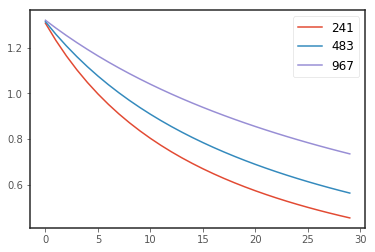

In [12]:


for w0 in Omegas:
    N=4
    T_ph = 77.
    w_2 = 1.4*ev_to_inv_cm
    bias = 0#10e-3*ev_to_inv_cm #0.0000001*ev_to_inv_cm
    V = 10e-3*ev_to_inv_cm #0.00001*ev_to_inv_cm
    alpha = 1.
    T_EM = 6000.
    alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
    Gamma = 200
    PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w0,
                      silent=True, exc_diff=0)
    data_dict_ = calculate_WC_add_steadystate_comparison(PARAMS, str(int(w0)), threshold=0.)
    plot_population_ratio(data_dict_, label=str(int(w0)))

In [31]:
N =8
#wc = 50.
w_0 = 30e-3*ev_to_inv_cm
Gamma = 30e-3*ev_to_inv_cm
#N=4
T_ph = 300.
w_2 = 1.4*ev_to_inv_cm
bias = 10e-3*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = 10e-3*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 1.
T_EM = 6000.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)

data_dict_1_w1 = calculate_WC_add_steadystate_comparison(PARAMS, '1a-300', threshold=0.)

1.625
11.75
23.0
34.25
45.5
Calculation took 6637.964284896851 seconds
Filename: DATA/Gamma_w0_dep/3ls_1a-300


In [72]:
N =7
#wc = 50.
w_0 = 60e-3*ev_to_inv_cm
Gamma = 30e-3*ev_to_inv_cm
#N=4
T_ph = 77.
w_2 = 1.4*ev_to_inv_cm
bias = 0*1e-3*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = 10e-3*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 1.
T_EM = 6000.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3

In [7]:
N =8
#wc = 50.
w_0 = 60e-3*ev_to_inv_cm
Gamma = 30e-3*ev_to_inv_cm
#N=4
T_ph = 300.
w_2 = 1.4*ev_to_inv_cm
bias = 10e-3*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = 10e-3*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 1.
T_EM = 6000.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3

#Gamma = 200

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)

data_dict_1_w2 = calculate_WC_add_steadystate_comparison(PARAMS, '1b', threshold=0.)

1.3389830508474576
8.889830508474576
17.279661016949152
25.66949152542373
34.059322033898304
41.610169491525426
Calculation took 3659.2719819545746 seconds
Filename: DATA/WC_validity_ss/3ls_1b


In [8]:
N =7
#wc = 50.
w_0 = 120e-3*ev_to_inv_cm
Gamma = 30e-3*ev_to_inv_cm

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)

data_dict_1_w2 = calculate_WC_add_steadystate_comparison(PARAMS, '1c', threshold=0.)

1.3389830508474576
8.889830508474576
17.279661016949152
25.66949152542373
34.059322033898304
41.610169491525426
Calculation took 4394.735204935074 seconds
Filename: DATA/WC_validity_ss/3ls_1c


In [22]:
240e-3*ev_to_inv_cm

1935.72

In [18]:
N =6
#wc = 50.
w_0 = 240e-3*ev_to_inv_cm
Gamma = 30e-3*ev_to_inv_cm

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)

data_dict_1_w2 = calculate_WC_add_steadystate_comparison(PARAMS, '1c', threshold=0.)

1.625
11.75
23.0
34.25
45.5
Calculation took 2475.9989070892334 seconds
Filename: DATA/Gamma_w0_dep/3ls_1c


In [10]:
# plotting function to see excited state population as a function of alpha, each w0 on the plot

In [28]:
1000*5000/ev_to_inv_cm

619.9243692269544

In [ ]:
N =7
#wc = 50.
w_0 = 200.
Gamma = 1*w_0

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)

data_dict_1 = calculate_WC_add_steadystate_comparison(PARAMS, '1', threshold=0.)

In [12]:
data_dict_1 =load_obj("DATA/WC_validity_ss/3ls_1")

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PLOTS/PAPER/Redfield-comparison-UD.pdf


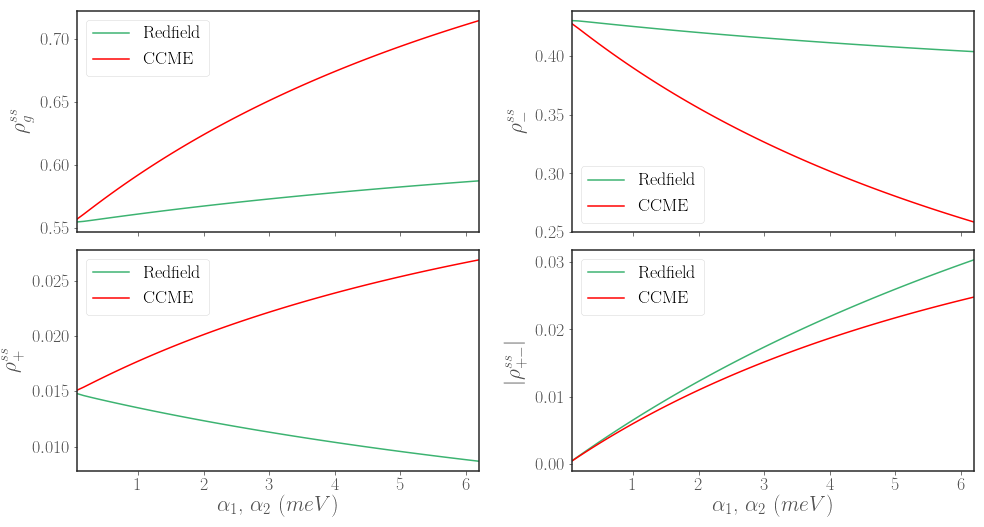

In [13]:
plot_dynamics(data_dict_1, figname='PLOTS/PAPER/Redfield-comparison-UD.pdf')

# larger $\omega_0$

In [20]:
w_0 = 500.
Gamma = 200.
N=6
alpha=10.
T_ph = 300.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)

data_dict_2 = calculate_WC_add_steadystate_comparison(PARAMS, 2, threshold=0.)

1.3389830508474576
8.889830508474576
17.279661016949152
25.66949152542373
34.059322033898304
41.610169491525426
Calculation took 2944.7763431072235 seconds
Filename: DATA/WC_validity_ss/3ls_2


In [8]:
def B_for_min_decay(PARAMS):
    Delta = PARAMS['V']*2
    eta = sqrt(Delta**2 + PARAMS['bias']**2)
    fp = sqrt(eta+PARAMS['bias'])
    fm = sqrt(eta-PARAMS['bias'])
    return (Delta/(2*PARAMS['bias']))*((4*PARAMS['bias']**2)/(Delta**2*PARAMS['mu']))*((fp+fm)/(fp-fm))
print(B_for_min_decay(PARAMS))

4.2663256059105015


In [15]:
data_dict_2 =load_obj("DATA/WC_validity_ss/3ls_2")

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


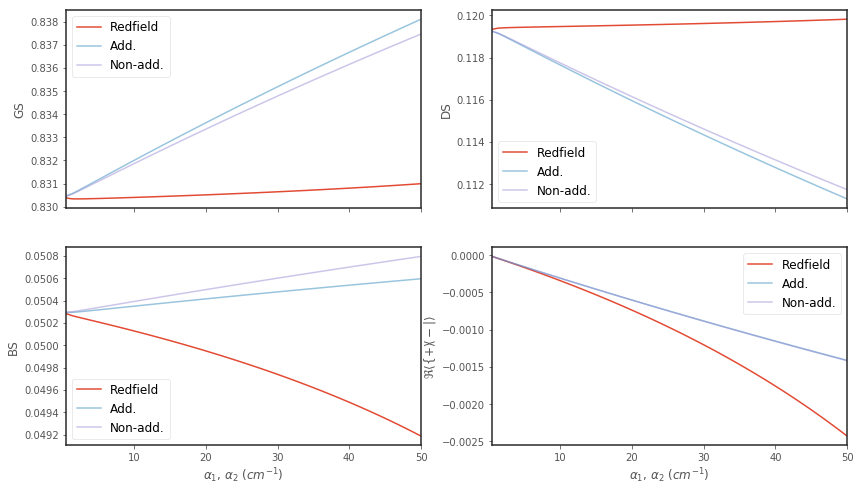

In [16]:
plot_dynamics(data_dict_2)

# Low $T_{ph}$

In [ ]:
w_0 = 200.
Gamma = 2*w_0 #200.

T_ph = 77.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
data_dict_3 = calculate_WC_add_steadystate_comparison(PARAMS, 3, threshold=0.)

In [ ]:
data_dict_3 =load_obj("DATA/WC_validity_ss/3ls_3")

In [ ]:
plot_dynamics(data_dict_3)

# very high $\omega_0$ (underdamped), but not larger than site energy

In [12]:
w_0 = 5000.
Gamma = 200.
N=4
T_ph = 300.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
data_dict_4 = calculate_WC_add_steadystate_comparison(PARAMS, 4, threshold=0.)

1.3389830508474576
8.889830508474576
17.279661016949152
25.66949152542373
34.059322033898304
41.610169491525426
Calculation took 8700.722556829453 seconds
Filename: DATA/WC_validity_ss/3ls_4


In [19]:
data_dict_4 =load_obj("DATA/WC_validity_ss/3ls_4")

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


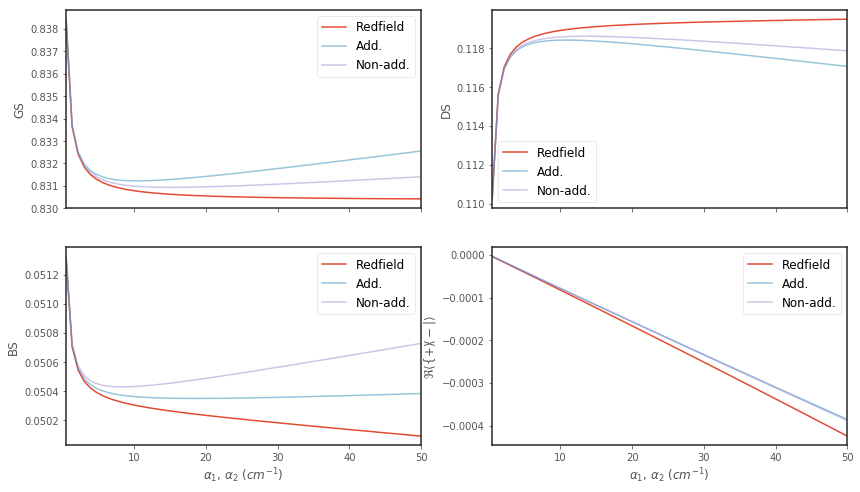

In [20]:
plot_dynamics(data_dict_4)

In [ ]:
print (beta_f(300), beta_f(77), beta_f(100), beta_f(150))

# Overdamped

This case shows perfect dark state protection behaviour in Redfield case

In [ ]:
1.4

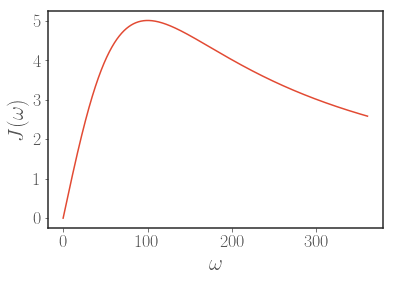

1.625
11.75
23.0
34.25
45.5
Calculation took 10040.624598026276 seconds
Filename: DATA/Gamma_w0_dep/3ls_OD-300


In [17]:
N=5
T_ph = 300.
w_2 = 1.4*ev_to_inv_cm
bias = 10*1e-3*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = 10e-3*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 1.
T_EM = 6000.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
w0 = 2000. # 
Gamma = (w0**2)/100
eta = gap(bias, V)
plot_UD_SD(Gamma, 10, w0, eps=2*eta)


PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w0,
                      silent=True, exc_diff=0)

data_dict_5 = calculate_WC_add_steadystate_comparison(PARAMS, 'OD-300', threshold=1e-8)

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PLOTS/PAPER/steadystates-overdamped-300.pdf


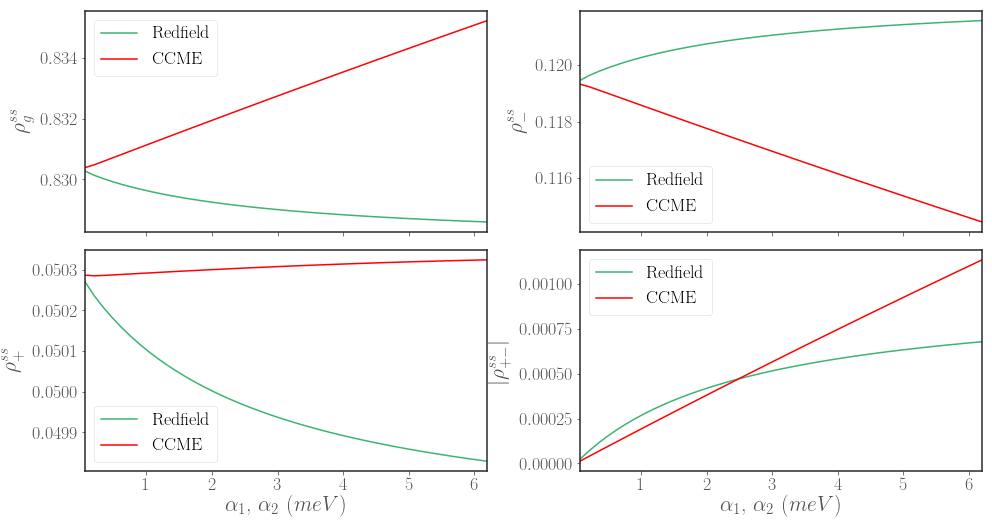

In [19]:
plot_dynamics(data_dict_5, "PLOTS/PAPER/steadystates-overdamped-300.pdf")

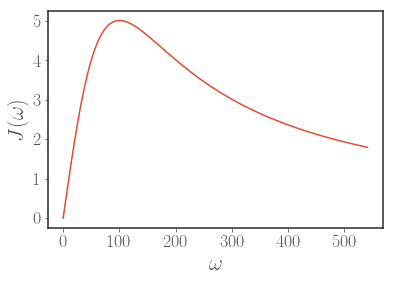

1.625
11.75
23.0
34.25
45.5
Calculation took 6323.620673894882 seconds
Filename: DATA/Gamma_w0_dep/3ls_OD-300-2


/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PLOTS/PAPER/steadystates-overdamped-300.pdf


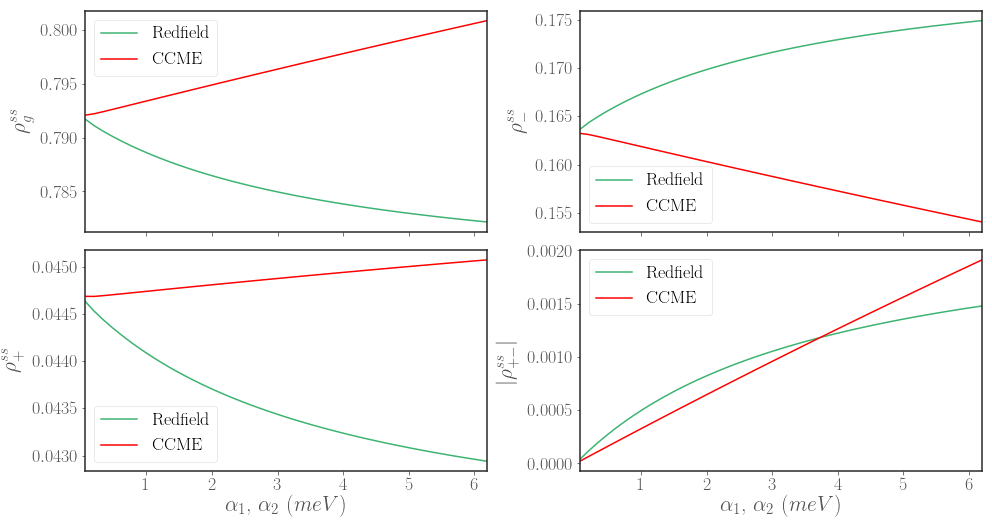

In [18]:
N=5
T_ph = 300.
w_2 = 1.4*ev_to_inv_cm
bias = 15*1e-3*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = 15e-3*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 1.
T_EM = 6000.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
w0 = 2000. # 
Gamma = (w0**2)/100
eta = gap(bias, V)
plot_UD_SD(Gamma, 10, w0, eps=2*eta)


PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w0,
                      silent=True, exc_diff=0)

data_dict_OD2 = calculate_WC_add_steadystate_comparison(PARAMS, 'OD-300-2', threshold=1e-8)
plot_dynamics(data_dict_OD2, "PLOTS/PAPER/steadystates-overdamped-300.pdf")

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PLOTS/PAPER/steadystates-overdamped-300.pdf


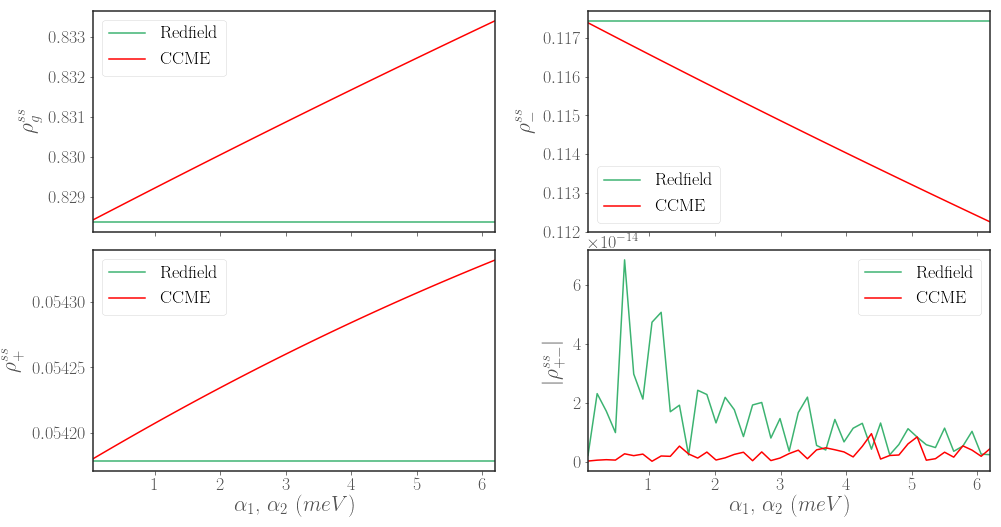

In [14]:

data_dict_7 =load_obj("DATA/Gamma_w0_dep/3ls_UD-300")
#save_obj(data_dict_5, )
plot_dynamics(data_dict_7, "PLOTS/PAPER/steadystates-overdamped-300.pdf")

In [10]:
#N=4
T_ph = 150.
w_2 = 1.4*ev_to_inv_cm
bias = 10e-3*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = 10e-3*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 1.
T_EM = 6000.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
w0 = 2000. # 
Gamma = (w0**2)/100
eta = gap(bias, V)
plot_UD_SD(Gamma, 10, w0, eps=2*eta)

N=5

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w0,
                      silent=True, exc_diff=0)
data_dict_5 = calculate_WC_add_steadystate_comparison(PARAMS, 5, threshold=1e-8)

1.625
11.75
23.0
34.25
45.5
Calculation took 12299.088975906372 seconds
Filename: DATA/Gamma_w0_dep/3ls_5


/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PLOTS/PAPER/steadystates-overdamped-150.pdf


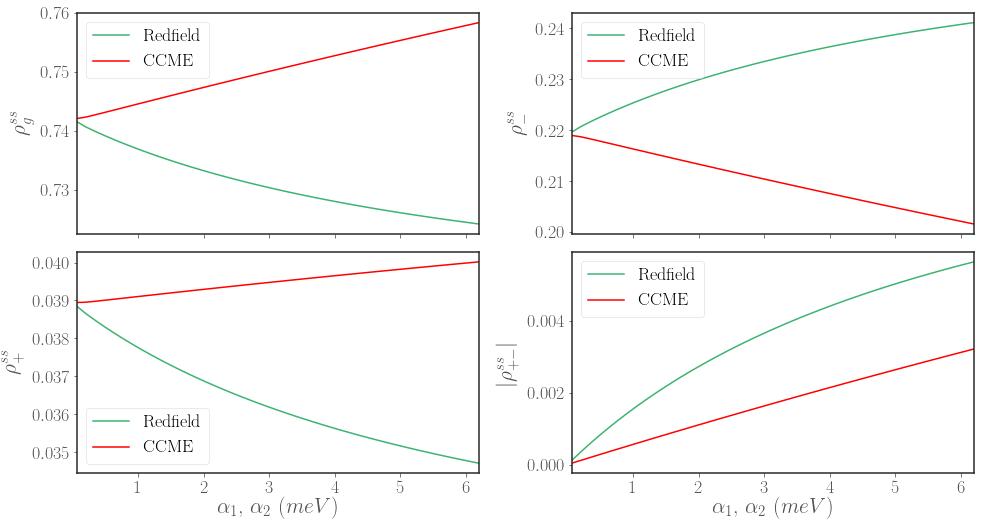

In [15]:
data_dict_7 =load_obj("DATA/Gamma_w0_dep/3ls_5")
#save_obj(data_dict_5, )
plot_dynamics(data_dict_7, "PLOTS/PAPER/steadystates-overdamped-150.pdf")

In [9]:
plt.style.use('ggplot')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.5
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'

def calculate_expval(rho_list, op_list, obs='OO'):
    return [(op_list[i][obs]*rho).tr() for i, rho in enumerate(rho_list)]

def plot_dynamics(data_dict, figname="PLOTS/nothing.pdf"):
    PARAMS = data_dict['PARAMS']
    # code goes here to take in and plot dynamics for wc, add and non-add
    phonons = 1000*data_dict['phonons']/ev_to_inv_cm
    colours = [ '#3CB371',  '#FF0000', '#1E90FF',  '#FFA500']
    #labels = ['wc shift','s', 'Redfield', 'Add. Shift', 'Add.', 'Non-add.']
    labels = ['Redfield', 'CCME']
    f, ((ax1, ax2),(ax3, ax4))  = plt.subplots(2, 2, sharex=True, figsize=(14,8))
    # ['_add_shift', '_wc_shift', '_wcs']
    for i, suff in enumerate(['_wc', '_nonadd']):
        if suff in ['_wc_shift', '_wc', '_wcs']:
            alpha=1
            ls='solid'
            op_list = [make_expectation_operators(PARAMS, weak_coupling=True, shift=True)]*len(phonons)
        else:
            op_list =data_dict['op_list']
            alpha=1
            #ls='dotted'
        #GS pop
        ax1.plot(phonons, calculate_expval(data_dict['rho'+suff], op_list, obs='OO'), 
                 label=labels[i], alpha=alpha, ls=ls, color=colours[i])
        ax1.set_ylabel(r"$\rho_{g}^{ss}$")
        ax1.set_xlim(phonons[0], phonons[-1])
        ax1.legend()
        #DS pop
        ax2.plot(phonons, calculate_expval(data_dict['rho'+suff], op_list, obs='dark'), 
                 label=labels[i], alpha=alpha, ls=ls, color=colours[i])
        ax2.set_xlim(phonons[0], phonons[-1])
        ax2.set_ylabel(r"$\rho_{-}^{ss}$")
        ax2.legend()
        
        ax3.plot(phonons, calculate_expval(data_dict['rho'+suff], op_list, obs='bright'), 
                 label=labels[i], alpha=alpha, ls=ls, color=colours[i])
        ax3.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(meV)$")
        ax3.set_ylabel(r"$\rho_{+}^{ss}$")
        ax3.set_xlim(phonons[0], phonons[-1])
        ax3.legend()
        eig = np.array(calculate_expval(data_dict['rho'+suff],
                               op_list, obs='eig_x'))+ np.array(calculate_expval(data_dict['rho'+suff], 
                                                                      op_list, obs='eig_y'))
        ax4.plot(phonons, np.abs(eig), 
                 label=labels[i], alpha=alpha, ls=ls, color=colours[i])
        ax4.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(meV)$")
        ax4.set_ylabel(r"$|\rho_{+-}^{ss}|$")
        #ax4.set_ylabel(r"$\Re \langle\{+\rangle\!\langle -|\rangle$")
        ax4.set_xlim(phonons[0], phonons[-1])
        ax4.legend()
    #ax1.plot(phonons, calculate_expval(data_dict['rho_add'], op_list, obs='OO'), 
    #                 alpha=alpha, ls='dashed', color=colours[1])
    #ax2.plot(phonons, calculate_expval(data_dict['rho'+suff], op_list, obs='dark'), 
    #                alpha=alpha, ls='dashed', color=colours[1])
    #ax3.plot(phonons, calculate_expval(data_dict['rho'+suff], op_list, obs='bright')
    #             , alpha=alpha, ls='dashed', color=colours[1])
    #ax4.plot(phonons, np.abs(eig), alpha=alpha, ls='dashed', color=colours[1])
    plt.subplots_adjust(left=0.09, bottom=0.1, right=0.98, top=0.9, wspace=0.23, hspace=0.08)
    plt.savefig(figname)
    print(figname)

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PLOTS/PAPER/steadystates-overdamped.pdf


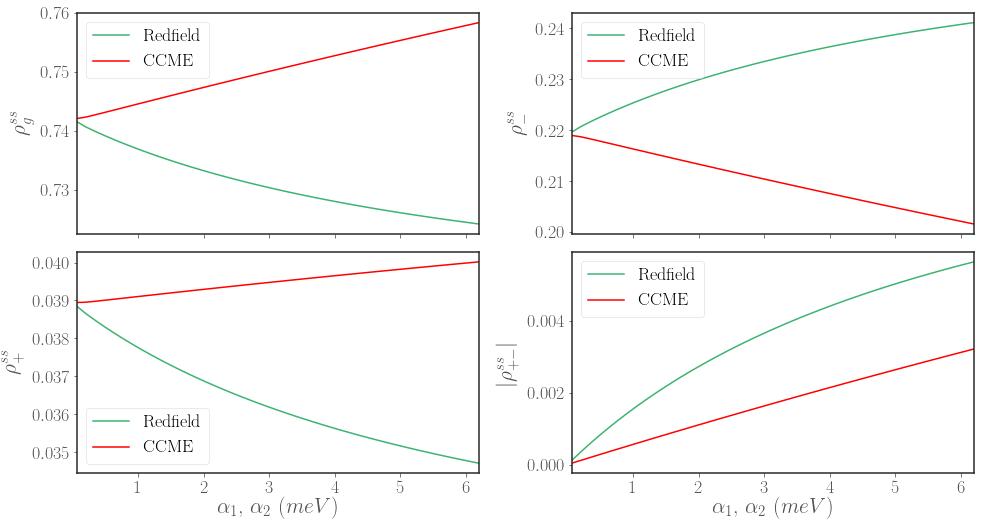

In [10]:
data_dict_5 =load_obj("DATA/population_ratio_comparison_overdamped")
#save_obj(data_dict_5, )
plot_dynamics(data_dict_5, "PLOTS/PAPER/steadystates-overdamped.pdf")

In [26]:
1000*200/ev_to_inv_cm

24.796974769078172

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PLOTS/PAPER/Redfield-comparison-UD-hf.pdf


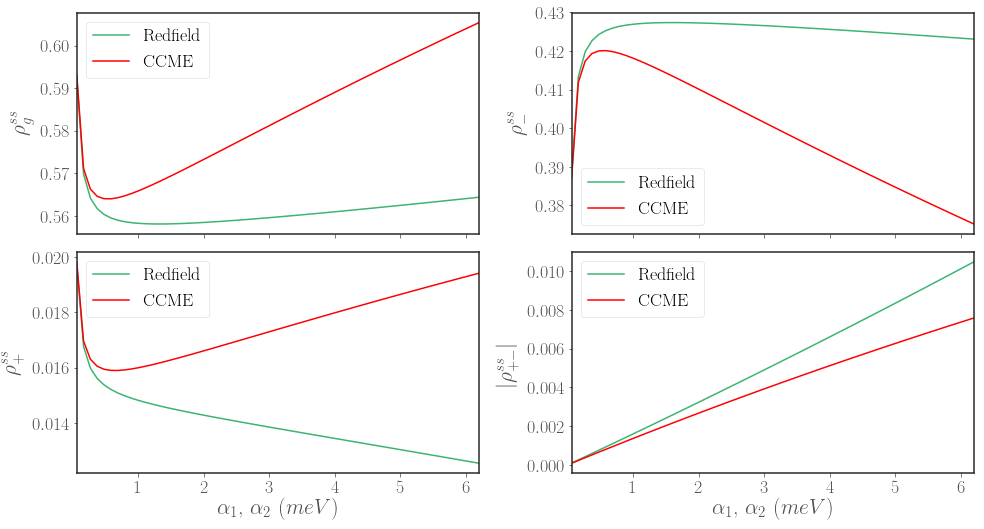

In [11]:
#data_dict_1 =load_obj("DATA/WC_validity_ss/3ls_1a")
#data_dict_2 =load_obj("DATA/WC_validity_ss/3ls_1b")
data_dict_3 =load_obj("DATA/WC_validity_ss/3ls_1c")
#plot_dynamics(data_dict_1)
#plot_dynamics(data_dict_2)
plot_dynamics(data_dict_3, figname='PLOTS/PAPER/Redfield-comparison-UD-hf.pdf')